# Titanic - Prevendo sobreviventes
### By: Sávio Murillo Dias Bastos

Análise e previsão do dataframe do Titanic fornecido pelo Kaggle com intuito de trabalhar conceitos de ciência de dados. 
Aplicando um modelo de previsão dos sobreviventes do naufrágio do titanic.

# Entedimento do negócio

O DataFrame do Titanic do Kaggle contém informações detalhadas dos passageiros a bordo do navio. Sendo utilizado para análises, estudos e modelagem preditiva relacionados ao desastre. Os dados incluem características como idade, sexo, classe da cabine e taxa de sobrevivência. 

Neste case serão exploradas:
- Tratativas do dados;
- Avaliação de modelos de classificação;
- Implementação de um modelo de predição de sobreviventes do desastre.

# Entendimento dos dados

Nesta etapa foi gerado um relatório utilizando ProfileReport para avaliação inicial, identificação de nulos, verificação do tipos de dados e contagem de valores. Existem dados que incluem características como identificação dos passageiros, idade, sexo, taxa de sobrevivencia, cabine e etc.

In [1081]:
#Importando pandas para tratar os dados
import pandas as pd
#Utilizando o ProfileReport para gerar relatório geral inicial
from ydata_profiling import ProfileReport

In [975]:
#Criando dataset de treino
treino = pd.read_csv('train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [976]:
#Gerando relatório do dataset
profile = ProfileReport(treino, title = 'titanic_treino')
profile.to_file('your_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 137.98it/s]


In [977]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [978]:
#tipos de dados
treino.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [979]:
#valores nulos
treino.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [980]:
#importando base de teste
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [981]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [982]:
#tipos de dados
test.dtypes.value_counts()

object     5
int64      4
float64    2
Name: count, dtype: int64

In [983]:
#valores nulos
test.isnull().sum().sort_values(ascending=False).head()

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

Há colunas que possuem valores vazios na base de teste que não estão na base de treino, por isso é necessário tratar as bases individualmente.

# Tratamento dos dados

Tratando nulos

In [984]:
#valores nulos
treino.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [985]:
#analisando tamanho da base
treino.shape

(891, 12)

In [986]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [987]:
#Verificando cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

Colunas de alta cardinalidade como nome, número do ticket e código da cabine, irão diminuir a acurácia do modelo por torná-lo menos generalizável. Por isso vamos removê-las.

In [988]:
#Removendo colunas da base de treino
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [989]:
#Removendo colunas da base de test
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [990]:
#Verificando a média das idades 
treino.Age.mean()

29.69911764705882

In [991]:
#Selecionando colunas com idade em vazio para substituir com a média
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()

In [992]:
#Selecionando colunas com idade em vazio para substituir com a média
test.loc[test.Age.isnull(),'Age'] = test.Age.mean()

Para base de treino existem 2 valores vazio na coluna Embarked 
  
  - Podemos verificar e substituir os vazios pela moda

In [993]:
#Verificando os valores da coluna
treino.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [994]:
#Selecionando a moda
treino.Embarked.mode()[0]

'S'

In [995]:
treino.loc[treino.Embarked.isnull(), 'Embarked'] = treino.Embarked.mode()[0]

Para finalizar, a base de teste ainda possui 1 valor vazio em 'Fare'

- Podemos utilizar a mesma lógica da coluna Age e substituir pela moda

In [996]:
#Verificando a média da coluna Fare para a base de teste
test.loc[test.Fare.isnull(), 'Fare'] = test.Fare.mean()

Verificando os vazios pós tratamento:

In [997]:
treino.isnull().sum().sort_values(ascending=False).head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [998]:
test.isnull().sum().sort_values(ascending=False).head()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

#### Considerando apenas as colunas que são de texto

In [999]:
#Verificando colunas de texto na base de treino
treino_nr = treino.columns[treino.dtypes != 'object']
treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [1000]:
#Selecionando apenas os valores numéricas da base de treino
treino_nr = treino.loc[:,treino_nr]

In [1001]:
#Fazendo o mesmo para a base de teste
test_nr = test.columns[test.dtypes != 'object']
test_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [1002]:
#Selecionando apenas os valores numéricas da base de teste
test_nr = test.loc[:,test_nr]

# Selecionar modelo para classificação

Foram propostos três modelos de classificação:

- Árvore de decisão;
- KNN;
- Regressão Logística.

Após gerar os modelos, avaliaremos o desempenho de cada um e selecionaremos o de melhor acurácia.

In [1003]:
from sklearn.model_selection import train_test_split

In [1004]:
#Separando a base de treino em x e y
#Nao vou utuilizar o passengerid pois ele vai atrapalhar o trabalho do modelo

X = treino_nr.drop(['PassengerId','Survived'],axis=1)
Y = treino.Survived

In [1005]:
#Separando em treino e validação (para nao confundir com o dataset 'test' criado anteriormente)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

### Para árvore de classificação

In [1006]:
from sklearn import tree

In [1007]:
#criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [1008]:
# fit dos dados
clf_ac = clf_ac.fit(X_train, Y_train)

In [1009]:
#Fazendo previsão
Y_pred_ac = clf_ac.predict(X_val)

### Para KNN

In [1010]:
from sklearn.neighbors import KNeighborsClassifier

In [1011]:
#Criando classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [1012]:
#fit dos dados
clf_knn = clf_knn.fit(X_train, Y_train)

In [1013]:
#Fazendo previsão
Y_pred_knn = clf_knn.predict(X_val)

### Para Regressão Logistica

In [1014]:
from sklearn.linear_model import LogisticRegression

In [1015]:
#criando classificador 
clf_rl = LogisticRegression(random_state=42)

In [1016]:
#fit dos dados
clf_rl = clf_rl.fit(X_train, Y_train)

In [1017]:
#Fazendo previsão
Y_pred_rl = clf_rl.predict(X_val)

# Avaliação dos modelos

### Avaliando pela acurária 

In [1018]:
from sklearn.metrics import accuracy_score

In [1019]:
#avaliação da arvore
accuracy_score(Y_val, Y_pred_ac)

0.6169491525423729

In [1020]:
#avaliação do KNN
accuracy_score(Y_val, Y_pred_knn)

0.6542372881355932

In [1021]:
#avaliação da regressao
accuracy_score(Y_val, Y_pred_rl)

0.7254237288135593

### Avaliando a matriz de confusao

In [1022]:
from sklearn.metrics import confusion_matrix

In [1023]:
#Para a árvore
confusion_matrix(Y_val, Y_pred_ac)

array([[125,  50],
       [ 63,  57]], dtype=int64)

In [1024]:
#Para o knn
confusion_matrix(Y_val, Y_pred_knn)

array([[133,  42],
       [ 60,  60]], dtype=int64)

In [1025]:
#Para a regressao logistica
confusion_matrix(Y_val, Y_pred_rl)

array([[156,  19],
       [ 62,  58]], dtype=int64)

# Prevendo os dados de teste

A partir da avaliação dos modelos, o modelo com melhor desempenho foi o de regressão logística, por tanto seguiremos com a previsão em cima desse modelo de regressão.

In [1026]:
#visualizando X_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
6,1,54.000000,0,0,51.8625
718,3,29.699118,0,0,15.5000
685,2,25.000000,1,2,41.5792


In [1027]:
#Visualizando a base de teste (apenas numéricos)
test_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [1028]:
#Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_test = test_nr.drop('PassengerId', axis=1)

In [1029]:
#Utilizando a regressao logistica na base de teste
Y_pred = clf_rl.predict(X_test)

In [1030]:
#Criando uma nova coluna com a previsão na base de teste
test['Survived'] = Y_pred

In [1031]:
#Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = test[['PassengerId', 'Survived']]

In [1032]:
#Exportando para csv
base_envio.to_csv('resultado.csv',index=False)

# Elevando a acurácia 

Após a primeira predição, vamos agora refinar o modelo de modo que seja possível aumentar a acurácia e obter um modelo mais eficiente. O intuito agora é aumentar o rendimento anterior de 0.66 e subir algumas posições no desafio do Kaggle.

## Entendendo as colunas de texto

A presença das colunas 'Sex' e 'Embarked' estão dividas em algumas categorias. Vamos usar algumas técnicas de tratamento para melhorar o desempenho do modelo.

In [1033]:
#Verificando as colunas de texto na base de treino
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [1034]:
#Verificando os valores na coluna Sex
treino.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [1035]:
#na coluna Embarked
treino.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Na coluna sex, podemos criar uma nova coluna chamada 'Male_Check', que vai receber 1 no caso de masculino e 0 para feminino.

In [1036]:
#Usando lambda para fazer esse tratamento
treino['Male_Check'] = treino.Sex.apply(lambda x: 1 if x =='male' else 0)

In [1037]:
#verificando valores
treino[['Sex','Male_Check']].value_counts()

Sex     Male_Check
male    1             577
female  0             314
Name: count, dtype: int64

In [1038]:
#Usando lambda para fazer esse tratamento
test['Male_Check'] = test.Sex.apply(lambda x: 1 if x =='male' else 0)

In [1039]:
#verificando valores
test[['Sex','Male_Check']].value_counts()

Sex     Male_Check
male    1             266
female  0             152
Name: count, dtype: int64

## One Hot Encoder 
Tratando a coluna Embarked, criando uma nova coluna para cada um dos rótulos

In [1040]:
#Importando 
from sklearn.preprocessing import OneHotEncoder

In [1041]:
#criando o enconder
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')

In [1042]:
#Fazendo o fit dos dados
ohe = ohe.fit(treino[['Embarked']])

In [1043]:
#Transformando
ohe.transform(treino[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [1044]:
#Transformando esse resultado em um df
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [1045]:
#Vamos adicionar a coluna acima à base de treino
treino = pd.concat([treino, ohe_df], axis=1)

In [1046]:
treino[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
Name: count, dtype: int64

## Replicando para a base de teste

In [1047]:
#Transformando esse resultado em um df
ohe_df = pd.DataFrame(ohe.transform(test[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head(3)


,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0


In [1048]:
#Adicionando o resultado para a base de teste
test = pd.concat([test, ohe_df],axis=1)

In [1049]:
#Verificando os valores
test[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
Name: count, dtype: int64

### Train_Test_Split

In [1050]:
# Eliminando colunas já tratadas ('Sex', 'Embarked')
treino = treino.drop(['Sex','Embarked'], axis=1)
test = test.drop(['Sex','Embarked'], axis=1)

In [1051]:
#Importando o train_test_split
from sklearn.model_selection import train_test_split

#Separando a base de treino
X = treino.drop(['PassengerId','Survived'], axis=1)
Y = treino.Survived

In [1052]:
#Separando em treino e validação
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

### Árvore de decisão

In [1053]:
### Para árvore de classificação
from sklearn import tree
#criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [1054]:
# fit dos dados
clf_ac = clf_ac.fit(X_train, Y_train)
#Fazendo previsão
Y_pred_ac = clf_ac.predict(X_val)

### KNN

In [1055]:
### Para KNN
from sklearn.neighbors import KNeighborsClassifier
#Criando classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [1056]:
#fit dos dados
clf_knn = clf_knn.fit(X_train, Y_train)
#Fazendo previsão
Y_pred_knn = clf_knn.predict(X_val)

### Regressão Logística

In [1057]:
### Para Regressão Logistica
from sklearn.linear_model import LogisticRegression
#criando classificador 
clf_rl = LogisticRegression(random_state=42)

In [1058]:
#fit dos dados
clf_rl = clf_rl.fit(X_train, Y_train)
#Fazendo previsão
Y_pred_rl = clf_rl.predict(X_val)

c:\Users\savio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Teste de acurácia

In [1059]:
### Avaliando pela acurária 
from sklearn.metrics import accuracy_score

In [1060]:
#avaliação da arvore
accuracy_score(Y_val, Y_pred_ac)

0.7491525423728813

In [1061]:
#avaliação do KNN
accuracy_score(Y_val, Y_pred_knn)

0.7152542372881356

In [1062]:
#avaliação da regressao
accuracy_score(Y_val, Y_pred_rl)

0.8135593220338984

In [1063]:
### Avaliando a matriz de confusao
from sklearn.metrics import confusion_matrix

In [1064]:
#Para a árvore
confusion_matrix(Y_val, Y_pred_ac)

array([[138,  37],
       [ 37,  83]], dtype=int64)

In [1065]:
#Para o knn
confusion_matrix(Y_val, Y_pred_knn)

array([[147,  28],
       [ 56,  64]], dtype=int64)

In [1066]:
#Para a regressao logistica
confusion_matrix(Y_val, Y_pred_rl)

array([[152,  23],
       [ 32,  88]], dtype=int64)

Podemos observar que a Regressão Logística continua tendo a melhor acurácia, dentre os modelos testados. Assim, seguiremos com esta técnica para realizar a predição.

## Usando nova base no modelo

In [1067]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


### Realizando previsão com Regressão Logística

In [1068]:
# Visualizando o x_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S
6,1,54.000000,0,0,51.8625,1,0,0,1
718,3,29.699118,0,0,15.5000,1,0,1,0
685,2,25.000000,1,2,41.5792,1,1,0,0


In [1072]:
#Visualizando a base de teste
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0


In [1073]:
#Para a base de teste ser igual a base treino, vamos eliminar a coluna de id
X_test = test.drop(['PassengerId','Survived'], axis=1)
X_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0


In [1074]:
#Utilizando a regressão na base de teste
Y_pred = clf_rl.predict(X_test)

In [1075]:
#Criando uma nova coluna com a previsão na base de teste
test['Survived'] = Y_pred

In [1079]:
#Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = test[['PassengerId', 'Survived']]

In [1082]:
base_envio['Survived'].value_counts()

Survived
0    252
1    166
Name: count, dtype: int64

In [1080]:
base_envio.to_csv('Arquivo_Final.csv', index=False)

## Resultado obtido: 
Com a acurácia de 0.81, conseguimos observar que houveram 418 passageiros, 166 sobreviveram. A partir da submissão no Kaggle, foi possível aumentar o desempenho do modelo, saindo de 0.66 para 0.756, o que considero um resultado satisfatório para a proposta desse projeto.

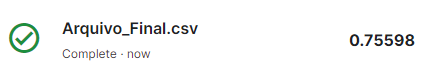